In [1]:
import csv
import sys
import os
import pandas as pd
import numpy as np
from numpy import *
from datetime import datetime
from operator import itemgetter
from collections import defaultdict

import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

%matplotlib inline

#plt.style.use('ggplot')
df=pd.read_excel('H:/lottery/ssq.xls',sheet_name='data')
df.columns=['num', 'date', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'b', 'sr1', 'sr2',
       'sr3', 'sr4', 'sr5', 'sr6', 'sales_volume', 'pool', 'first', 'bonus1', 'second', 'bonus2',
       'third', 'bonus3', 'fourth', 'bonus4', 'fifth', 'bonus5', 'sexth', 'bonus6']
#df.tail()
X = df.iloc[:,2:8]
X.tail()

,r1,r2,r3,r4,r5,r6
2181,5,13,14,23,25,31
2182,1,7,10,11,26,27
2183,2,3,5,9,13,28
2184,6,15,17,18,23,30
2185,4,5,11,14,28,32


In [ ]:
################    1 multiclass model for sorted data
################    1.1 preprocessing data for sorted data

In [2]:
starttime = datetime.now()
(num_rows, num_columns) = X.shape
def creat_datasets(X, features ):
    df_ = pd.DataFrame(columns = list(range(0, features)))
    index = 0
    for i in range(features, num_rows+1):
        df_.loc[index] = X[col][i-features: i].reset_index(drop = True)
        index += 1
    return df_

for col in X.columns :
    locals()['df_'+ str(col)] = creat_datasets(X, 100)
endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')
# 至此6个数据集完成

62 seconds


In [5]:

def classifier_data(df_):
    # choose frequence >10 samples
    df = df_[df_.ilco[-1].isin(df_.ilco[-1].groupby(df_.ilco[-1]).count()[df_.ilco[-1].groupby(df_.ilco[-1]).count()>30].index)]
    X_ = df.iloc[:, : -1].values
    y_ =  df.ilco[:, -1].astype(str).values
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=14)
    return X_, y_, X_train, X_test, y_train, y_test
def classifier_score(clf, cv=3):
    precision = cross_val_score(clf, X_, y_, cv=cv, scoring='precision_weighted')
    recall = cross_val_score(clf, X_, y_, cv=cv, scoring='recall_weighted')
    fls = cross_val_score(clf, X_, y_, cv=cv, scoring='f1_weighted')
    return precision, recall, fls

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
################    1.2 DT classifier model parameters choose and predict for sorted data

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    7.3s finished
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'pr

df_R1 ['8'] precison: [ 0.14444062  0.06285065  0.07009692] recall: [ 0.06736527  0.07507508  0.06515152] f1: [ 0.07418303  0.05849852  0.05627982]
Pipeline(steps=[('clf', DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=20,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=14, splitter='best'))])
Confusion matrix, without normalization
[[ 0  8 20  6  8 18  3 14 12  8 26 15]
 [ 0 15  0  0  0  1  0  2  0  0  1  2]
 [ 0  0 13  1  0  0  0  1  0  0  0  2]
 [ 0  0  0 11  0  1  0  0  0  0  1  1]
 [ 0  6  8 11 10 11  1  7  4  4 10 14]
 [ 0  6 13  7  5 30  4  4  7  4 11  7]
 [ 0  7  3  8  2  8  7  1 10  6  7  9]
 [ 0  4  5  3  1 10  1 16  7  1  4  8]
 [ 0  4  3  6  2  3  0  0 13  2  9  8]
 [ 0  5  9  3  0  3  0  2  3 11  3  3]
 [ 0  2  2  1  0  2  2  0  2  3 14  3]
 [ 0  2  3  1  1  2  0  1  0  1  4 19]]


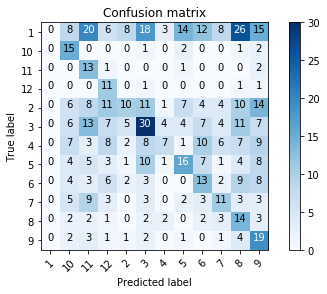

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    8.8s finished
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'pr

df_R2 ['3'] precison: [ 0.07  0.08  0.07] recall: [ 0.06  0.05  0.07] f1: [ 0.05  0.05  0.06]
Pipeline(steps=[('clf', DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=50, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=20,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=14, splitter='best'))])
Confusion matrix, without normalization
[[ 8  0  2  2  1  4  4  9  4  1  3  2  1  2  0  1  2]
 [ 3  9  4  3  3  2  2  5  6  5  0  2  1  2  0  0  0]
 [ 6  2  7  2  3  1  4  3  4  3  1  0  1  0  0  2  3]
 [ 3  0  0  6  0  3  3  2  8  3  0  2  1  2  0  2  0]
 [ 3  1  2  0 14  1  3  1  3  5  2  0  2  0  0  0  0]
 [ 0  0  1  1  1 10  0  3  2  1  1  1  1  0  1  0  0]
 [ 0  0  1  2  1  0 19  3  2  2  1  0  1  0  0  0  0]
 [ 1  0  0  0  0  1  1  8  0  0  1  0  1  0  0  0  1]
 [ 0  0  0  0  0  0  0  2 14  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  3  1  0  5  0 12  1  0 

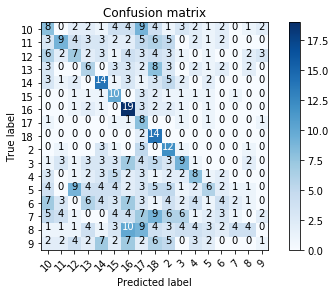

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    8.1s finished
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', '

df_R3 ['17'] precison: [ 0.06  0.03  0.04] recall: [ 0.06  0.05  0.05] f1: [ 0.05  0.03  0.04]
Pipeline(steps=[('clf', DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=40,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=14, splitter='best'))])
Confusion matrix, without normalization
[[ 0  0  0  2  0  1  0  5  0  0  0  7  6  4  7  2  3  1  0]
 [ 0  8  0  0  0  5  0  5  0  0  0  2  5  7  5  4  2  1  0]
 [ 0  3  0  2  0  5  0  4  1  0  0  1  7  4  6  7  2  2  0]
 [ 0  1  0  4  0  2  0  7  2  0  0  3  9 11  8  3  1  3  0]
 [ 0  1  0  0  0  1  0 15  1  0  0  0  5  3  9 11  2  5  0]
 [ 0  1  0  2  0  3  0  8  1  0  0  1  5 10  3  3  2  6  0]
 [ 0  1  0  1  0  3  0 11  4  0  0  3  4  7  3  2  2  0  0]
 [ 0  0  0  0  0  2  0  9  1  0  0  3  3  5  4  3  1  0  0]
 [ 0  2  0  1  0  2  0  5  5  0  0  1  9  3

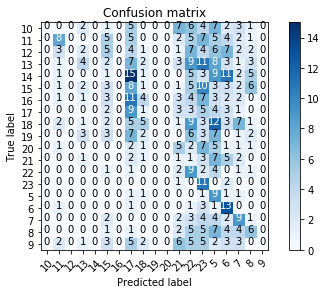

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    8.9s finished
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', '

df_R4 ['18'] precison: [ 0.02  0.05  0.03] recall: [ 0.04  0.05  0.04] f1: [ 0.02  0.04  0.03]
Pipeline(steps=[('clf', DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=40,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=14, splitter='best'))])
Confusion matrix, without normalization
[[ 9  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 2  5  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  1]
 [ 3  4  3  3  2  0  0  0  0  0  0  0  0  1  0  1  1  2  2  2]
 [ 5  6  0  8  0  0  1  0  1  0  0  0  0  0  0  1  0  1  3  2]
 [ 5  4  1  5  2  0  1  0  1  2  0  0  0  2  0  0  0  1  2  4]
 [ 5  7  0  2  1  0  2  0  2  2  0  0  0  1  0  2  0  5  6  4]
 [ 7 13  2  2  1  0  3  0  0  0  0  0  0  0  0  1  1  3  1  5]
 [14 10  0  5  4  0  1  0  1  0  0  0  0  2  0  2  3  8  4  3]
 [ 6 11  1  3  0

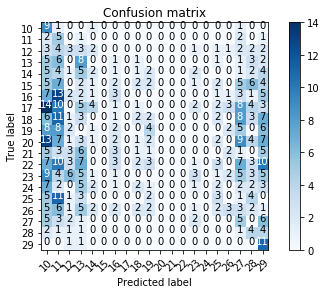

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    7.5s finished
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', '

df_R5 ['31'] precison: [ 0.04  0.07  0.06] recall: [ 0.04  0.06  0.04] f1: [ 0.03  0.05  0.03]
Pipeline(steps=[('clf', DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=50, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=20,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=14, splitter='best'))])
Confusion matrix, without normalization
[[ 8  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  1  1  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  3  7  1  0  0  0  0  0  1  1  0  0  0  0  0  0  1]
 [ 0  0  1 17  0  0  0  0  0  0  1  2  0  1  0  1  4  0]
 [ 2  2  2  0 15  1  1  0  1  0  1  0  0  1  1  0  3  1]
 [ 0  1  1  2  3  7  0  0  0  1  1  0  0  1  0  1  0  2]
 [ 5  5  2  4  1  3  4  0  0  0  3  2  0  4  1  1  7  2]
 [ 4  4  4  2  4  3  4  5  1  2  2  0  0  0  2  3  3  2]
 [ 0  5  3  5  3  3  1  2  7  0  1  1  0  2  1  2  2  7]
 [ 6  3  4

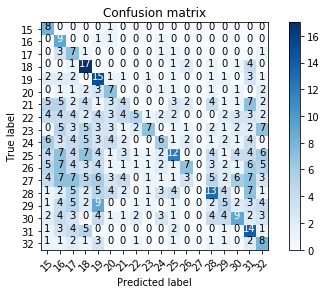

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    7.8s finished
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', '

df_R6 ['23'] precison: [ 0.    0.02  0.01] recall: [ 0.03  0.09  0.06] f1: [ 0.01  0.03  0.01]
Pipeline(steps=[('clf', DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=20,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=14, splitter='best'))])
Confusion matrix, without normalization
[[  1   0   4   0   0   0   0   0   0   0   0   0   0]
 [  0   0  14   1   0   0   0   0   0   0   0   0   0]
 [  0   0  12   0   0   0   0   0   0   0   0   0   0]
 [  0   0  22   1   0   0   0   0   0   0   0   0   0]
 [  0   0  28   1   0   0   0   0   0   0   0   0   0]
 [  2   2  40   0   0   0   0   0   0   0   0   0   0]
 [  0   0  39   0   0   0   0   0   0   0   0   0   0]
 [  1   0  47   1   0   0   0   0   0   0   0   0   0]
 [  0   0  60   0   0   0   0   0   0   0   0   0   0]
 [  2   1  82   2   0   0   0

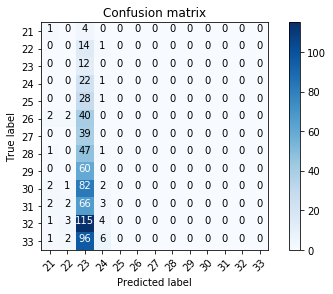

63 seconds


In [6]:
from sklearn.tree import DecisionTreeClassifier
######### DT  predict result
# gridsearchCV looking for best parameters
starttime = datetime.now()
#start = time.time()

'''pro_ball = defaultdict(int)
pipeline_DT = Pipeline([('clf', DecisionTreeClassifier(random_state=14))])
paras_DT = {'clf__max_depth': (2, 10, 50),
            'clf__criterion': ('gini', 'entropy'),
            #'clf__min_samples_split': (2, 3),
            'clf__min_samples_leaf': (20, 30, 40)}

for i in range(1,7):
    df_ =  locals()['df_r'+ str(i)]
    # choose frequence >10 samples
    df_ = df_[df_[99].isin(df_[99].groupby(df_[99]).count()[df_[99].groupby(df_[99]).count()>10].index)]
    X_train = df_.iloc[:, : -1].values
    y_train = df_[99].astype(str).values
    #print(y_train)
    #y_train = [1 if x else 0 for x in y_train]
    grid_DT=GridSearchCV(pipeline_DT, paras_DT, n_jobs=-1, verbose=1)
    grid_DT.fit(X_train, y_train)
    print('df_r'+ str(i), grid_DT.predict(df_.iloc[-1,1: ].values.reshape(1,-1)), 
          grid_DT.predict_proba(df_.iloc[-1,1: ].values.reshape(1,-1)))
    print(grid_DT.best_estimator_)
    pro_ball[i] = grid_DT.predict_proba(df_.iloc[-1,1: ].values.reshape(1,-1))'''

pipeline_DT = Pipeline([('clf', DecisionTreeClassifier(random_state=14, class_weight='balanced'))])
paras_DT = {'clf__max_depth': (2, 10, 50),
            'clf__criterion': ('gini', 'entropy'),
            'clf__min_samples_split': (2, 3, 4),
            'clf__min_samples_leaf': (20, 30, 40)}
for i in range(1,7):
    df_ =  locals()['df_r'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = classifier_data(df_)
    
    grid_DT=GridSearchCV(pipeline_DT, paras_DT, n_jobs=-1, verbose=1, scoring=None)
    #default=None, and the default scorer of DT is accuracy. see also DecisionTreeClassifier.score(X, y)
    grid_DT.fit(X_, y_)
    # evaluation for best parameters
    precision, recall, fls = classifier_score(grid_DT.best_estimator_)
    new = grid_DT.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'precison:', precision, 'recall:', recall, 'f1:', fls)
    print(grid_DT.best_estimator_)
    
    class_names = np.unique(y_train)
    y_pred = grid_DT.predict(X_test)
    report = classification_report(y_test, y_pred)
    c = np.sum(y_test == y_pred)
    print(report)
    print('n_accuracy:', c)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names)
    plt.show()

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [11]:
# why 'F-score is ill-defined and being set to 0.0 in labels with no predicted samples' is always exist, the numbers of classes are too many
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
df_ = df_r1
# choose frequence >10 samples
df_ = df_[df_[99].isin(df_[99].groupby(df_[99]).count()[df_[99].groupby(df_[99]).count()>30].index)]
X_ = df_.iloc[:, : -1].values
y_ =  df_[99].astype(str).values
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=14)
grid_DT=GridSearchCV(pipeline_DT, paras_DT, n_jobs=-1, verbose=1)
    #default=None, and the default scorer of DT is accuracy. see also DecisionTreeClassifier.score(X, y)
grid_DT.fit(X_train, y_train)
    # evaluation for best parameters
'''precision = cross_val_score(grid_DT.best_estimator_, X_train, y_train, cv=3, scoring='precision_weighted')#预测为正类的样本中实际有多少是正
recall = cross_val_score(grid_DT.best_estimator_, X_train, y_train, cv=3, scoring='recall_weighted')#实际是正类的样本有多少被预测出来
fls = cross_val_score(grid_DT.best_estimator_, X_train, y_train, cv=3, scoring='f1_weighted')
new = grid_DT.predict(df_.iloc[-1,1: ].values.reshape(1,-1))'''
y_predict = grid_DT.best_estimator_.predict(X_test)
print(classification_report(y_test, y_predict))
print(grid_DT.best_estimator_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 155 out of 162 | elapsed:    5.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    5.5s finished


             precision    recall  f1-score   support

          1       0.15      0.03      0.05       138
         10       0.03      0.10      0.04        21
         11       0.03      0.18      0.05        17
         12       0.00      0.00      0.00        14
          2       0.07      0.01      0.02        86
          3       0.00      0.00      0.00        98
          4       0.13      0.13      0.13        68
          5       0.05      0.02      0.03        60
          6       0.07      0.08      0.07        50
          7       0.03      0.05      0.03        42
          8       0.07      0.13      0.09        31
          9       0.05      0.12      0.07        34

avg / total       0.07      0.05      0.05       659

Pipeline(steps=[('clf', DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=20,
            min_samples_split=2, min_

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
################    1.3  AdaBoostClassifier model parameters choose and predict for sorted data

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score

df_R1 ['2'] precison: [ 0.12  0.12  0.12] recall: [ 0.16  0.15  0.16] f1: [ 0.13  0.13  0.13]
Confusion matrix, without normalization
[[35  0  0  0 29 39 10 12  8  2  1  2]
 [ 5  0  0  0  7  3  3  1  0  2  0  0]
 [ 5  0  0  1  7  0  1  3  0  0  0  0]
 [ 5  0  0  0  3  2  1  1  0  1  1  0]
 [19  0  0  0 27 22  6  5  7  0  0  0]
 [33  0  1  0 31 14 12  3  1  0  2  1]
 [30  0  1  0 18  8  7  2  1  0  0  1]
 [24  0  0  0 14 13  5  1  2  0  0  1]
 [16  0  0  0  7 12  7  3  4  0  1  0]
 [15  0  0  0 12  4  7  3  1  0  0  0]
 [11  0  1  0 11  7  0  0  1  0  0  0]
 [10  0  0  0 10 12  2  0  0  0  0  0]]


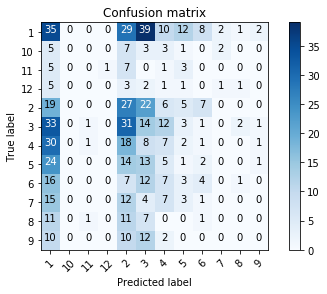

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


df_R2 ['6'] precison: [ 0.1   0.08  0.08] recall: [ 0.1   0.08  0.08] f1: [ 0.08  0.08  0.08]
Confusion matrix, without normalization
[[ 3  0  1  3  1  0  0  0  0  0  2  0  5 12  6  8  5]
 [ 4  1  1  0  1  0  1  0  0  0  1  1  3 12 12  7  3]
 [ 4  0  0  2  0  0  0  0  0  0  0  2  5  6  9  5  9]
 [ 3  0  0  0  1  0  1  0  0  0  2  3  3  5  7  6  4]
 [ 1  1  1  1  1  0  1  0  0  0  3  4  5  4  8  6  1]
 [ 2  0  0  1  0  0  0  0  0  0  2  0  1  1  5  7  4]
 [ 1  0  1  0  0  0  0  1  0  0  3  5  0  5  6  8  2]
 [ 1  1  0  1  0  0  0  0  0  0  0  0  2  3  3  2  1]
 [ 1  0  0  1  0  0  1  0  0  0  1  0  0  3  2  4  3]
 [ 5  0  2  2  1  0  0  0  0  0  0  0  1  1  4  4  4]
 [ 4  0  3  2  0  0  1  0  0  0  0  4  2  4 11  6  8]
 [ 0  1  2  0  0  0  0  0  0  0  0  1  4  7 10  8  2]
 [ 3  1  3  1  0  0  1  0  0  0  2  3  2 13 10  6  8]
 [ 5  2  0  1  0  0  0  0  0  0  0  2  1 12  9 13  7]
 [ 7  0  3  2  2  0  3  0  0  0  0  3  4  6 14  6  5]
 [ 6  1  1  2  0  1  0  0  0  0  3  5  5  8  8 11  7]
 [

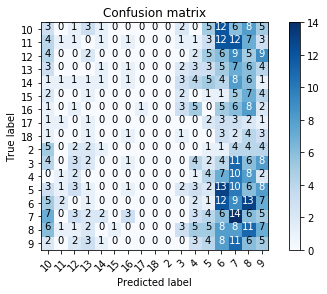

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


df_R3 ['13'] precison: [ 0.05  0.07  0.06] recall: [ 0.06  0.09  0.07] f1: [ 0.05  0.08  0.06]
Confusion matrix, without normalization
[[ 1  6  2  5  5  3  2  5  3  2  0  0  1  0  0  0  0  1  2]
 [ 7  7  4  5  2  3  4  5  0  2  3  0  0  0  0  0  1  1  0]
 [ 4  7  4  1  2  3  3  6  4  4  2  1  0  0  0  0  1  1  1]
 [ 2  5  7  5  5  5  9  5  2  1  0  2  1  0  0  0  2  2  1]
 [ 1  6  6  4  6  6  3  6  5  1  2  1  0  1  0  0  0  2  3]
 [ 2  3  6  3  4  4  1  8  1  0  1  1  1  1  0  0  2  5  2]
 [ 4  5  6  4  4  4  2  7  0  2  0  0  0  0  0  0  0  2  1]
 [ 4  1  5  0  3  3  3  2  2  2  3  0  1  0  0  0  0  0  2]
 [ 2  8 10  3  6  5  4  5  3  1  1  0  0  0  0  0  1  2  0]
 [ 7  2  4  1  4  4  0  5  0  1  1  0  2  0  0  0  0  2  1]
 [ 0  6  1  2  3  4  1  2  1  1  0  0  1  0  0  0  0  3  1]
 [ 0  2  0  4  3  2  3  4  2  0  2  0  1  0  0  0  0  0  0]
 [ 2  1  2  1  2  4  2  4  0  1  0  1  0  0  0  0  0  0  1]
 [ 0  1  2  1  0  2  2  0  1  2  1  0  0  0  0  0  0  2  0]
 [ 1  2  3  2  1  0  1  1

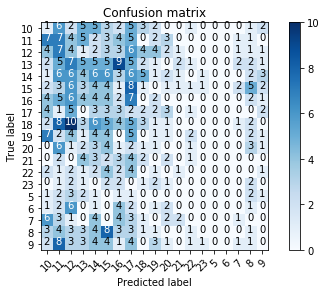

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


df_R4 ['17'] precison: [ 0.05  0.07  0.08] recall: [ 0.05  0.07  0.07] f1: [ 0.05  0.07  0.07]
Confusion matrix, without normalization
[[0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 2 2 2 0]
 [1 0 0 0 0 1 0 3 1 1 0 0 0 1 1 0 1 0 0 1]
 [1 3 2 0 0 0 2 0 1 0 3 2 1 1 1 3 3 1 0 0]
 [0 3 2 2 1 0 0 3 4 1 0 1 1 1 2 2 1 1 2 1]
 [1 5 0 3 0 2 0 2 2 1 2 1 1 0 4 0 3 0 1 2]
 [2 3 2 0 2 0 1 6 2 2 2 1 0 1 5 3 3 2 2 0]
 [4 3 3 0 0 2 3 2 1 2 3 4 0 1 1 5 3 1 1 0]
 [2 6 5 1 1 2 1 5 1 1 1 7 5 2 2 6 5 2 2 0]
 [0 7 2 1 2 7 4 6 4 3 1 0 1 0 0 2 5 0 1 0]
 [1 4 0 2 0 4 2 2 4 3 1 1 3 1 2 0 4 1 2 1]
 [2 3 4 1 3 6 3 6 1 2 1 1 1 2 3 1 5 3 2 2]
 [0 1 3 2 1 4 1 3 1 0 1 2 1 2 1 1 4 1 1 0]
 [2 7 4 2 3 1 3 6 1 1 3 1 1 4 3 2 9 3 2 1]
 [2 5 6 0 1 6 3 2 2 1 0 1 1 2 2 2 4 0 4 1]
 [1 4 1 0 0 3 1 4 0 3 0 0 3 1 2 2 3 0 1 1]
 [2 5 1 0 1 0 2 4 0 2 0 1 2 0 0 1 4 0 4 1]
 [2 3 1 1 0 1 0 5 0 2 2 2 2 1 2 0 9 2 1 1]
 [1 3 2 1 0 0 0 5 1 2 1 1 0 0 0 2 3 1 1 0]
 [0 2 1 0 0 0 0 3 1 0 0 0 0 1 3 1 0 0 1 1]
 [0 0 2 1 0 1 0 1 0 1 0 2 4 0 0 0 1 0 0 0]]


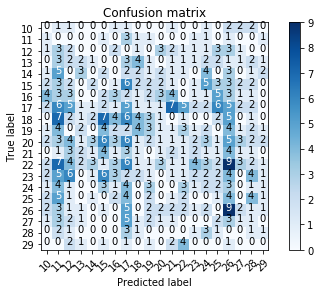

df_R5 ['29'] precison: [ 0.07  0.08  0.08] recall: [ 0.07  0.09  0.08] f1: [ 0.07  0.08  0.08]
Confusion matrix, without normalization
[[ 0  0  0  0  0  0  0  0  0  0  2  3  0  2  1  1  0  0]
 [ 0  0  0  0  0  0  1  1  1  1  4  1  0  2  0  0  0  1]
 [ 0  0  0  0  0  0  0  2  0  1  0  6  3  0  0  0  1  1]
 [ 0  0  2  0  1  1  0  3  2  1  3  3  3  3  1  2  2  0]
 [ 0  0  0  0  1  1  0  1  1  3  3 10  2  2  1  4  1  1]
 [ 0  0  0  0  2  2  1  0  1  0  2  3  5  2  0  1  1  0]
 [ 0  0  0  0  0  1  2  2  3  1  5  7  3  8  6  4  2  0]
 [ 1  0  0  1  1  3  2  2  2  5  3  8  3  5  2  4  3  0]
 [ 0  0  1  1  2  0  0  3  5  3  6  9  1  4  4  4  2  0]
 [ 2  0  3  0  0  0  3  2  4  6  3  1  5  4  4  5  2  0]
 [ 1  0  4  0  1  2  3  2  4  8  8  7 11  2  2  8  2  0]
 [ 0  3  3  0  3  2  0  3  2  5  3  5  7  7  4  5  2  0]
 [ 0  2  1  1  0  0  1  3  4  4  8 12 12  6  2  4  3  2]
 [ 0  1  2  2  0  0  1  2  1  4  8 10  7  6  5  4  1  0]
 [ 0  0  1  1  2  0  0  5  3  1  8  4  3  7  3  1  1  0]
 [ 1  0  0

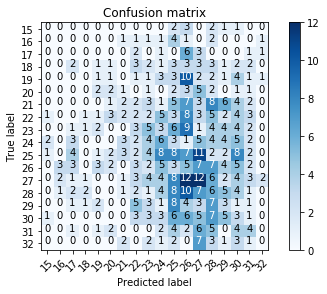

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score

df_R6 ['29'] precison: [ 0.09  0.1   0.11] recall: [ 0.12  0.13  0.15] f1: [ 0.1   0.11  0.12]
Confusion matrix, without normalization
[[ 0  0  0  0  0  0  0  0  1  1  1  2  0]
 [ 0  0  0  0  0  0  2  0  1  1  2  3  6]
 [ 0  0  0  0  0  0  0  1  2  3  2  2  2]
 [ 0  0  0  0  0  0  1  0  2  6  7  3  4]
 [ 0  0  0  0  0  0  0  2  8  4  5  6  4]
 [ 0  0  0  0  1  0  1  2  3  5 12 10 10]
 [ 0  0  0  0  0  0  1  1  4  4 11 10  8]
 [ 1  0  0  0  2  0  0  0  3  9 12  8 14]
 [ 0  0  0  0  1  5  2  3  4  7 19 12  7]
 [ 0  0  0  0  0  1  5  4  8  6 16 21 26]
 [ 1  1  1  0  1  0  5  1  6  8 14 17 18]
 [ 0  0  0  0  2  1  3  5 20 18 25 21 28]
 [ 0  0  0  0  0  1  5  4 12 13 24 23 23]]


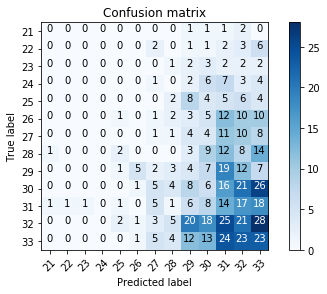

1969 seconds


In [7]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, random_state=14, class_weight='balanced'), 
                         random_state=14, n_estimators=1000, learning_rate=1)
# 为什么加上max_depth=2后程序反而慢很多，是因为要剪枝吗？？？
for i in range(1,7):
    df_ =  locals()['df_r'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = classifier_data(df_)
    
    precision, recall, fls = classifier_score(clf)
    
    clf.fit(X_, y_)
    new = clf.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'precison:', precision, 'recall:', recall, 'f1:', fls)
    
    clf.fit(X_train, y_train)
    class_names = clf.classes_
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred)
    c = np.sum(y_test == y_pred)
    print(report)
    print('n_accuracy:', c)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names)
    plt.show()

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [ ]:
################    1.4  BaggingClassifier model parameters choose and predict for sorted data

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score

df_R1 ['1'] precison: [ 0.06  0.07  0.08] recall: [ 0.2   0.2   0.21] f1: [ 0.08  0.08  0.09]
Confusion matrix, without normalization
[[120   0   0   0  16   1   0   0   0   0   1   0]
 [ 19   0   0   0   2   0   0   0   0   0   0   0]
 [ 13   0   0   1   3   0   0   0   0   0   0   0]
 [ 11   0   0   0   3   0   0   0   0   0   0   0]
 [ 76   0   0   1   9   0   0   0   0   0   0   0]
 [ 83   0   0   0  15   0   0   0   0   0   0   0]
 [ 59   0   0   0   9   0   0   0   0   0   0   0]
 [ 48   0   0   0  12   0   0   0   0   0   0   0]
 [ 39   0   0   0  11   0   0   0   0   0   0   0]
 [ 37   0   0   0   5   0   0   0   0   0   0   0]
 [ 26   0   0   0   5   0   0   0   0   0   0   0]
 [ 25   0   1   1   6   0   1   0   0   0   0   0]]


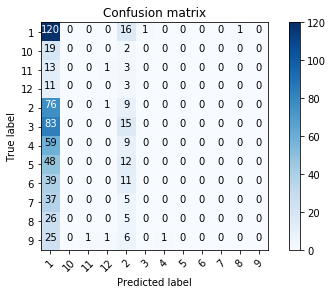

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


df_R2 ['8'] precison: [ 0.08  0.05  0.05] recall: [ 0.1   0.07  0.08] f1: [ 0.07  0.05  0.05]
Confusion matrix, without normalization
[[ 1  0  1  0  0  1  1  1  1  0  0  2  2  8 20  7  1]
 [ 1  0  2  1  0  0  1  0  0  0  0  3  2 14 14  7  2]
 [ 1  2  0  0  0  0  0  0  0  1  0  6  2  6 14  7  3]
 [ 3  0  0  0  0  0  0  0  0  0  0  1  3  6 12  7  3]
 [ 2  0  0  0  0  1  0  0  2  1  0  1  1  8 11  9  1]
 [ 1  0  0  0  0  0  0  0  0  0  0  4  1  4 10  3  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  1  2  4  8 14  2]
 [ 1  0  1  0  0  0  0  0  0  0  0  0  1  2  7  2  0]
 [ 2  0  0  0  0  1  0  0  0  0  0  1  0  3  5  4  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  2  1  3 11  5  1]
 [ 5  0  1  1  0  0  0  0  0  0  0  3  4 12 13  5  1]
 [ 2  0  0  0  0  0  0  0  0  0  0  1  2 10 12  7  1]
 [ 5  1  0  0  0  0  0  0  0  0  0  1  4 13 19  8  2]
 [ 3  2  0  1  1  1  0  0  0  0  0  3  1 11 18  8  3]
 [ 4  0  0  0  0  0  1  0  2  0  0  3  2 13 20  9  1]
 [ 1  1  0  0  2  1  0  1  0  0  1  1  3 12 24  8  3]
 [

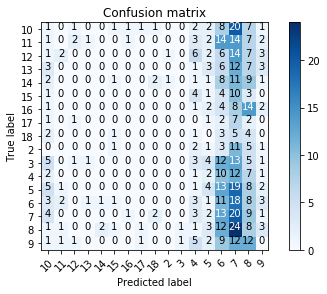

df_R3 ['12'] precison: [ 0.05  0.05  0.07] recall: [ 0.06  0.07  0.08] f1: [ 0.05  0.05  0.06]
Confusion matrix, without normalization
[[ 4  3  2  3  9  4  2  3  2  2  0  0  0  1  1  0  0  2  0]
 [ 7  7  1  5  7  5  4  3  1  0  1  0  0  0  1  0  0  0  2]
 [ 9  7  0  2 13  5  2  3  1  0  0  0  0  0  0  1  0  0  1]
 [ 4  5  6  6 11  4  4  6  0  2  1  0  1  1  1  0  0  1  1]
 [ 1  9  1  3 14  6  5  6  0  0  0  1  2  1  0  1  0  3  0]
 [11  4  6  2  9  2  2  3  1  1  0  0  0  0  1  1  0  1  1]
 [ 7  9  4  0 10  1  2  1  0  2  0  1  1  1  0  0  1  1  0]
 [ 1  3  2  2 11  2  1  3  0  0  1  0  1  0  0  0  1  2  1]
 [ 0 10  2  5  9  4  3  1  2  1  1  1  3  1  2  0  1  3  2]
 [ 1  9  2  2  8  4  3  0  0  2  0  1  1  0  0  0  0  1  0]
 [ 3  3  2  1  5  4  3  2  0  0  0  0  1  1  0  0  1  0  0]
 [ 0  4  4  0  7  2  4  1  0  0  0  0  0  0  0  0  0  1  0]
 [ 3  2  2  2  4  4  0  2  0  0  0  0  0  1  0  0  0  1  0]
 [ 0  3  2  1  3  3  0  0  1  0  0  0  0  0  0  0  0  1  0]
 [ 2  0  1  2  5  1  1  0

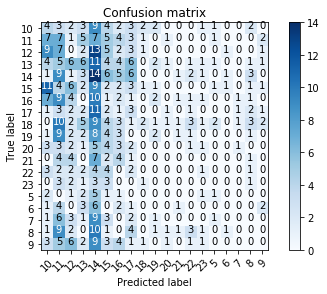

df_R4 ['23'] precison: [ 0.05  0.04  0.04] recall: [ 0.06  0.08  0.07] f1: [ 0.05  0.05  0.04]
Confusion matrix, without normalization
[[ 0  2  0  0  0  0  0  1  0  2  3  3  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  1  3  3  0  1  2  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  1  0  1  2  5  1  6  3  0  0  0  1  1  1]
 [ 0  2  0  1  0  0  0  3  4  3  7  1  2  2  0  0  1  1  0  1]
 [ 1  0  1  1  1  0  1  4  2  2  8  1  4  2  1  0  0  0  0  1]
 [ 0  0  0  0  0  2  2  2  3  5 10  4  4  4  1  1  0  1  0  0]
 [ 3  0  0  0  2  0  1  3  5  9  8  3  2  2  1  0  0  0  0  0]
 [ 0  1  0  0  1  2  2  6  3 15 15  1  5  3  0  0  0  0  3  0]
 [ 1  1  0  0  0  0  3  6  1  8  9  7  1  5  1  1  2  0  0  0]
 [ 1  1  0  0  2  0  1  6  1  7  8  4  1  2  1  1  1  1  0  0]
 [ 1  1  2  1  1  0  4  1  5 10 10  3  4  5  1  0  1  0  2  0]
 [ 0  2  0  0  0  0  4  2  1  9  7  0  2  2  0  0  0  1  0  0]
 [ 1  1  0  0  0  0  3  7  4  8 15 10  4  3  1  0  1  0  1  0]
 [ 0  0  0  0  1  0  1  3  2  8 18  0  3  5  1

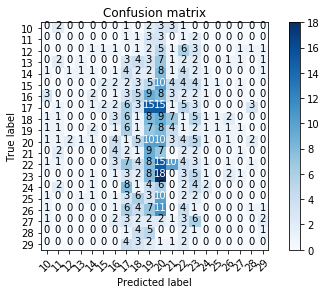

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


df_R5 ['25'] precison: [ 0.05  0.08  0.09] recall: [ 0.07  0.09  0.11] f1: [ 0.05  0.07  0.08]
Confusion matrix, without normalization
[[ 0  0  0  0  0  0  0  0  0  0  2  6  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  1  0  3  4  2  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  1  9  2  1  0  0  0  0]
 [ 0  1  0  0  0  1  0  1  2  1  9  6  0  4  2  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  1  0 19  4  3  0  2  0  0]
 [ 0  0  0  0  0  1  0  1  0  0  1  7  6  2  1  1  0  0]
 [ 0  0  1  0  0  0  1  0  1  1  6 13  6 12  2  1  0  0]
 [ 0  0  0  0  1  2  0  1  1  5  7 14  3  7  0  4  0  0]
 [ 0  2  1  0  0  1  0  1  0  2  1 17  6  8  2  4  0  0]
 [ 0  3  0  0  1  1  0  0  0  4  6 16  6  5  0  2  0  0]
 [ 0  0  0  0  0  2  0  0  2  2 11 27 10  3  1  6  1  0]
 [ 0  1  2  0  1  0  1  1  4  6  9 14  8  3  2  1  1  0]
 [ 1  3  1  0  0  0  0  4  0  3 10 25  4 12  1  0  0  1]
 [ 1  2  0  0  0  0  0  0  1  6  5 22  5 10  0  1  1  0]
 [ 0  1  1  1  0  1  0  2  1  2  7 16  3  3  1  1  0  0]
 [ 0  0  0

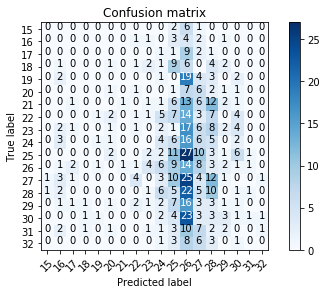

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score

df_R6 ['32'] precison: [ 0.08  0.15  0.1 ] recall: [ 0.14  0.17  0.17] f1: [ 0.08  0.1   0.09]
Confusion matrix, without normalization
[[ 0  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  1 11]
 [ 0  0  0  0  0  0  0  0  0  0  3  6  3]
 [ 0  0  0  0  0  0  0  0  0  1  7  5 10]
 [ 0  0  0  0  0  0  0  0  2  0  2 13 12]
 [ 0  1  0  0  0  0  0  0  0  0  7 19 17]
 [ 0  0  0  0  0  0  0  0  1  0 10 12 16]
 [ 0  0  0  0  0  0  0  0  0  1  8 20 20]
 [ 0  1  0  0  0  0  0  0  2  1  8 17 31]
 [ 0  2  0  0  0  0  0  0  4  0 18 32 31]
 [ 0  0  0  0  0  0  0  0  0  0 14 26 33]
 [ 0  3  0  0  0  0  0  0  4  1 19 40 56]
 [ 0  0  0  0  0  0  0  0  1  2 23 40 39]]


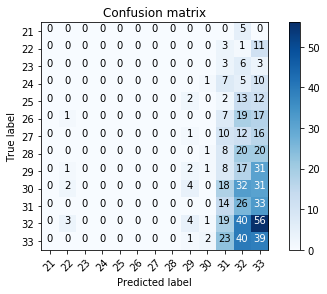

6223 seconds


In [9]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(DecisionTreeClassifier( random_state=14, class_weight='balanced'), 
                        random_state=14, n_estimators=1000, n_jobs=-1)

for i in range(1,7):
    df_ =  locals()['df_r'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = classifier_data(df_)
    
    precision, recall, fls = classifier_score(clf)

    clf.fit(X_, y_)
    new = clf.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'precison:', precision, 'recall:', recall, 'f1:', fls)
    
    clf.fit(X_train, y_train)
    class_names = clf.classes_
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred)
    c = np.sum(y_test == y_pred)
    print(report)
    print('n_accuracy:', c)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names)
    plt.show()

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')


In [ ]:

clf = BaggingClassifier(DecisionTreeClassifier(class_weight='balanced'), 
                        random_state=14, n_estimators=1000, n_jobs=-1)
# n_estimators 越多越接近
for i in range(1,7):
    df_ =  locals()['df_r'+ str(i)]
    df_ = df_.iloc[:-2, :]
    # choose frequence >10 samples
    df_ = df_[df_[99].isin(df_[99].groupby(df_[99]).count()[df_[99].groupby(df_[99]).count()>30].index)]
    X_ = df_.iloc[:, : -1].values
    y_ =  df_[99].astype(str).values
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=14)

    # evaluation for best parameters
    precision = cross_val_score(clf, X_, y_, cv=3, scoring='precision_weighted')#预测为正类的样本中实际有多少是正
    recall = cross_val_score(clf, X_, y_, cv=3, scoring='recall_weighted')#实际是正类的样本有多少被预测出来
    fls = cross_val_score(clf, X_, y_, cv=3, scoring='f1_weighted')
    
    clf.fit(X_, y_)
    new = clf.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'precison:', precision, 'recall:', recall, 'f1:', fls)
    
    clf.fit(X_train, y_train)
    class_names = clf.classes_
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred)
    c = np.sum(y_test == y_pred)
    print(report)
    print('n_accuracy:', c)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names)
    plt.show()

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')


In [ ]:
################    1.5  GradientBoostingClassifier model parameters choose and predict for sorted data

df_R1 ['2'] precison: [ 0.13  0.12  0.1 ] recall: [ 0.16  0.14  0.14] f1: [ 0.14  0.13  0.11]
Confusion matrix, without normalization
[[45  0  2  0 35 20 16  5  4  4  3  4]
 [10  0  0  0  4  4  1  0  1  1  0  0]
 [ 8  0  0  0  6  2  1  0  0  0  0  0]
 [ 1  0  0  0  5  4  1  0  2  1  0  0]
 [33  0  0  0 26  8  7  4  0  3  2  3]
 [28  0  0  0 31 19  3  5  6  2  2  2]
 [28  0  1  0 13 16  5  0  4  0  1  0]
 [22  0  0  0 20  3  4  4  1  2  2  2]
 [16  0  1  0 17 10  2  2  1  1  0  0]
 [14  1  1  0  7  6  5  2  4  1  1  0]
 [12  0  0  0  6  3  2  1  2  3  1  1]
 [11  1  1  0  9  4  3  3  1  1  0  0]]


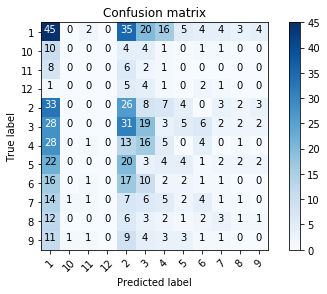

df_R2 ['11'] precison: [ 0.08  0.08  0.05] recall: [ 0.08  0.08  0.05] f1: [ 0.08  0.08  0.05]
Confusion matrix, without normalization
[[ 3  1  3  1  1  3  0  0  1  2  0  2  2  6  9  7  5]
 [ 2  6  1  0  1  0  1  0  1  0  4  7  4  6  3  6  5]
 [ 1  2  3  0  2  0  1  1  0  0  1  2  5  5  8  7  4]
 [ 3  1  1  2  0  3  2  1  2  2  3  2  4  0  5  2  2]
 [ 4  1  0  3  1  1  0  1  0  0  3  1  3  5  6  6  2]
 [ 2  2  1  1  0  0  0  0  0  1  1  3  2  3  2  3  2]
 [ 1  3  0  1  1  1  1  0  0  0  3  2  3  4  3  6  3]
 [ 2  0  3  0  0  0  0  1  0  0  0  0  2  2  2  2  0]
 [ 2  0  0  0  0  2  0  0  0  0  2  0  1  2  1  3  3]
 [ 4  1  2  1  0  1  0  0  1  0  0  3  2  0  3  3  3]
 [ 3  3  2  2  2  0  0  0  0  0  1  1  7  4  7  8  5]
 [ 1  1  3  1  0  0  2  0  0  1  0  1  4  8  9  1  3]
 [ 2  3  2  1  2  3  0  0  0  1  4  3  4  4 10  8  6]
 [ 3  5  4  5  2  0  0  0  0  0  3  3  5  5  8  7  2]
 [ 3  1  4  5  1  2  4  0  4  0  0  2  4  6  8  8  3]
 [ 4  3  4  4  3  2  0  0  0  0  1  7 10  7  6  6  1]
 

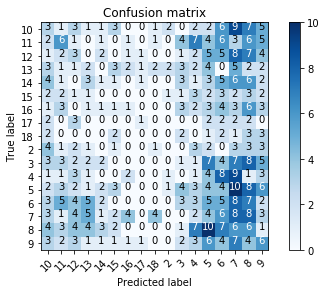

df_R3 ['11'] precison: [ 0.06  0.05  0.06] recall: [ 0.06  0.05  0.06] f1: [ 0.06  0.05  0.05]
Confusion matrix, without normalization
[[1 6 5 1 4 2 0 3 2 2 2 2 2 0 3 1 0 2 0]
 [4 4 2 6 2 7 2 2 1 3 1 3 2 0 1 0 1 1 2]
 [5 5 5 3 5 6 0 2 1 1 0 3 0 1 1 0 3 1 2]
 [2 5 5 4 8 2 1 5 1 5 2 5 3 1 0 0 1 2 2]
 [3 6 7 5 5 5 2 4 3 2 1 1 1 1 0 1 2 3 1]
 [7 6 7 4 2 1 1 5 2 2 0 2 0 0 0 0 2 2 2]
 [5 7 5 4 5 2 2 1 1 4 1 0 0 1 0 0 0 2 1]
 [1 1 3 5 3 2 4 1 3 2 4 0 0 0 0 0 0 1 1]
 [5 7 3 5 6 5 2 2 2 2 2 2 2 0 0 0 1 3 2]
 [2 7 1 3 2 0 6 1 2 2 1 2 1 0 0 0 2 1 1]
 [3 3 2 3 4 1 0 2 0 0 2 0 1 1 1 0 2 0 1]
 [0 2 2 2 2 2 4 1 3 0 1 1 0 0 1 0 0 1 1]
 [1 3 0 2 2 0 0 2 4 2 0 0 1 1 1 0 0 0 2]
 [0 1 4 2 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0]
 [0 1 1 1 1 2 0 0 2 0 0 1 0 1 2 0 1 1 0]
 [2 2 1 1 1 1 1 1 2 2 0 1 0 0 0 0 1 1 3]
 [1 2 4 3 3 6 2 1 1 2 1 0 0 0 0 0 0 1 0]
 [0 3 2 3 0 3 3 3 3 3 2 4 2 0 2 1 0 1 0]
 [1 4 3 3 5 2 3 2 1 4 2 2 1 1 0 0 1 1 1]]


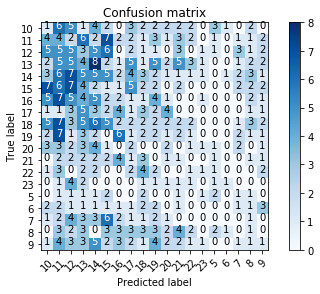

df_R4 ['27'] precison: [ 0.07  0.05  0.05] recall: [ 0.07  0.05  0.05] f1: [ 0.07  0.05  0.05]
Confusion matrix, without normalization
[[0 0 0 1 0 1 0 0 2 1 2 0 0 0 1 2 2 0 0 0]
 [1 0 0 0 0 0 1 0 1 2 1 1 0 0 1 1 0 1 0 1]
 [2 0 1 1 1 2 1 1 1 1 3 3 0 2 2 0 1 1 0 1]
 [0 1 0 2 0 1 1 2 1 1 3 6 3 3 0 0 2 2 0 0]
 [0 1 0 0 2 2 1 5 2 2 5 1 2 3 3 0 0 0 1 0]
 [0 1 0 0 1 2 2 3 3 3 1 3 6 4 4 4 0 2 0 0]
 [1 2 1 2 1 1 2 2 3 6 3 3 3 3 3 0 0 1 1 1]
 [1 1 3 2 1 2 2 3 3 8 9 4 7 2 2 1 0 5 0 1]
 [0 0 0 2 2 3 4 3 4 2 7 6 0 2 3 0 2 4 0 2]
 [0 0 0 2 2 1 2 2 5 4 4 1 2 3 4 0 1 3 1 1]
 [0 0 1 0 3 2 5 4 6 7 5 2 7 5 1 2 0 1 1 0]
 [1 2 0 1 2 3 1 2 2 3 1 0 2 4 2 1 0 3 0 0]
 [1 1 0 1 1 3 2 2 6 7 6 7 2 6 5 3 1 3 2 0]
 [0 1 0 0 2 3 3 3 2 4 9 3 3 3 1 2 2 4 0 0]
 [1 1 0 1 2 2 1 2 3 5 2 0 1 2 2 4 1 0 0 0]
 [0 1 1 0 0 0 1 5 3 2 8 2 3 2 1 0 0 0 0 1]
 [1 1 0 1 0 0 2 4 4 3 4 3 3 5 1 0 1 2 1 1]
 [1 0 1 0 0 1 2 1 2 3 4 2 1 1 3 1 0 0 0 1]
 [0 0 0 0 0 0 0 2 2 5 1 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 2 2 1 1 2 0 2 0 0 1 1 1 0 0 0 0]]


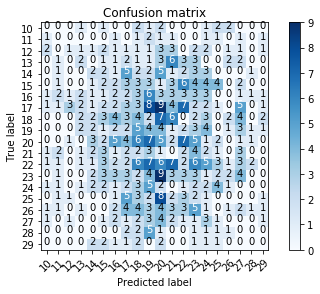

df_R5 ['30'] precison: [ 0.07  0.09  0.07] recall: [ 0.08  0.09  0.08] f1: [ 0.07  0.09  0.07]
Confusion matrix, without normalization
[[ 0  0  0  1  0  0  0  0  1  1  3  1  0  1  0  1  0  0]
 [ 0  0  0  0  0  0  2  0  1  0  3  3  1  1  1  0  0  0]
 [ 0  0  0  2  0  0  1  0  1  2  1  3  2  0  2  0  0  0]
 [ 0  1  0  0  2  2  1  2  4  2  4  1  1  3  3  1  0  0]
 [ 0  0  2  0  1  2  3  1  3  1  1  7  3  4  0  3  0  0]
 [ 0  0  1  0  1  1  0  0  1  1  1  3  4  3  3  1  0  0]
 [ 0  0  1  0  0  6  2  2  7  2  5  7  1  3  2  4  1  1]
 [ 0  0  0  0  2  2  3  1  1  7  3  5  3  4  5  8  1  0]
 [ 1  2  0  0  0  0  2  3  0  5  7  6  5  6  2  2  3  1]
 [ 0  0  0  1  1  6  1  0  4  7  5  4  4  5  3  1  1  1]
 [ 0  0  0  1  3  3  4  4  4  4  7 12  7  3  5  1  6  1]
 [ 0  1  2  1  2  1  0  2  2  8  8  8  6  5  1  4  3  0]
 [ 1  1  1  1  1  2  3  2  1  6 11  8  6  7  5  5  2  2]
 [ 0  1  1  1  4  2  0  7  3  3  4  8  4  7  4  4  1  0]
 [ 0  0  1  1  0  2  1  4  2  3  2  4  4  6  6  2  2  0]
 [ 0  0  0

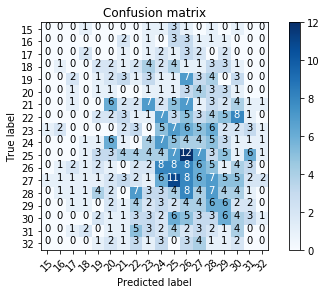

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


df_R6 ['32'] precison: [ 0.11  0.1   0.11] recall: [ 0.14  0.13  0.13] f1: [ 0.12  0.11  0.12]
Confusion matrix, without normalization
[[ 0  0  0  0  0  0  0  1  0  0  2  0  2]
 [ 0  0  0  0  1  0  0  0  1  2  2  2  7]
 [ 0  0  0  0  0  0  1  1  2  0  2  3  3]
 [ 0  0  0  0  0  1  0  0  3  4  3  3  9]
 [ 0  0  0  1  0  2  1  1  4  2  6  9  3]
 [ 0  0  0  0  0  0  1  3  6  6  5  8 15]
 [ 1  0  1  0  0  1  4  1  6  1 11  6  7]
 [ 0  0  1  0  1  1  2  4  1  2 11 10 16]
 [ 0  2  0  0  2  1  4  2  9  3 12  9 16]
 [ 2  1  1  0  1  1  7  5 10  9 12 15 23]
 [ 1  0  1  0  3  0  5  0  8  5 11 15 24]
 [ 1  3  2  0  1  1  6  2 13 18 24 25 27]
 [ 0  0  1  1  1  2  6  3 14 10 14 29 24]]


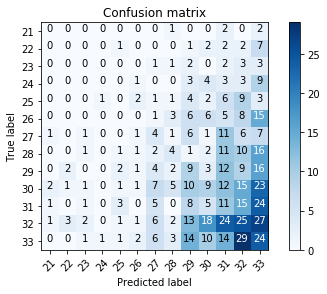

13085 seconds


In [10]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=1000, random_state=14)

for i in range(1,7):
    df_ =  locals()['df_r'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = classifier_data(df_)
    
    precision, recall, fls = classifier_score(clf)
    
    clf.fit(X_, y_)
    new = clf.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'precison:', precision, 'recall:', recall, 'f1:', fls)

    clf.fit(X_train, y_train)
    class_names = np.unique(y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred)
    c = np.sum(y_test == y_pred)
    print(report)
    print('n_accuracy:', c)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names)
    plt.show()
endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [ ]:
################    1.6 ExtraTreesClassifier model parameters choose and predict for sorted data

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score

df_R1 ['1'] precison: [ 0.07  0.06  0.09] recall: [ 0.21  0.2   0.2 ] f1: [ 0.08  0.08  0.08]
Confusion matrix, without normalization
[[115   0   0   0  23   0   0   0   0   0   0   0]
 [ 19   0   0   0   2   0   0   0   0   0   0   0]
 [ 14   0   0   0   3   0   0   0   0   0   0   0]
 [ 14   0   0   0   0   0   0   0   0   0   0   0]
 [ 71   0   0   1  14   0   0   0   0   0   0   0]
 [ 73   0   0   0  25   0   0   0   0   0   0   0]
 [ 56   0   0   0  11   1   0   0   0   0   0   0]
 [ 50   0   0   0  10   0   0   0   0   0   0   0]
 [ 38   0   0   0  12   0   0   0   0   0   0   0]
 [ 37   0   0   0   5   0   0   0   0   0   0   0]
 [ 26   0   0   0   5   0   0   0   0   0   0   0]
 [ 29   0   0   0   4   1   0   0   0   0   0   0]]


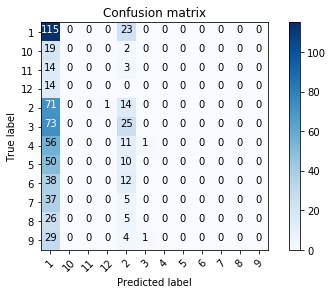

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


df_R2 ['6'] precison: [ 0.06  0.05  0.05] recall: [ 0.08  0.07  0.07] f1: [ 0.06  0.05  0.05]
Confusion matrix, without normalization
[[ 3  1  2  0  0  0  0  1  0  0  0  1  1 12 15  9  1]
 [ 3  0  1  0  0  0  1  0  0  0  0  1  4  7 13 11  6]
 [ 2  1  0  0  0  0  0  0  0  0  1  3  3  7 15  9  1]
 [ 4  0  3  0  0  0  0  0  0  0  0  1  1  4 12  7  3]
 [ 5  0  0  0  0  0  0  0  1  1  0  1  0 11  8  9  1]
 [ 1  0  0  1  0  0  0  0  0  0  0  1  2  6  8  3  1]
 [ 0  0  0  0  1  0  0  0  0  0  0  4  4  4  9  8  2]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  2  2  7  0  2]
 [ 1  0  0  0  0  0  0  0  0  0  1  0  1  2  9  1  1]
 [ 1  0  0  0  0  1  0  0  0  0  0  2  3  3 10  2  2]
 [ 2  0  0  1  0  1  0  0  0  0  0  3  4 10 12 10  2]
 [ 1  0  2  0  0  1  0  0  1  0  0  0  3  8 15  2  2]
 [ 6  0  1  0  0  1  0  0  0  0  0  3  8 11 16  6  1]
 [ 5  1  0  1  0  0  0  0  0  0  0  5  2  8 22  6  2]
 [ 3  1  1  0  0  0  1  0  0  0  0  3  1  7 24  8  6]
 [ 1  2  0  0  2  0  0  1  0  0  1  3  4  8 27  7  2]
 [

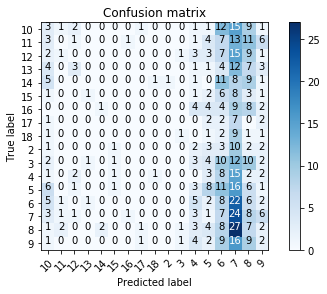

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


df_R3 ['13'] precison: [ 0.05  0.07  0.05] recall: [ 0.05  0.08  0.06] f1: [ 0.04  0.06  0.05]
Confusion matrix, without normalization
[[ 1  6  4  5  9  4  2  6  0  1  0  0  0  0  0  0  0  0  0]
 [ 5  6  3  6 11  5  0  2  1  1  0  0  0  0  0  0  0  2  2]
 [ 5  3  1  4 11  7  4  3  1  2  0  1  1  0  0  0  0  1  0]
 [ 5  4  8  4 10  4  7  2  0  1  1  0  3  1  3  0  0  0  1]
 [ 3  8  6  3 10  5  6  3  1  1  0  3  1  1  1  0  0  1  0]
 [ 0  9  2  6 11  6  3  1  1  2  1  0  1  0  1  0  0  0  1]
 [ 6  7  3  3 11  2  2  2  1  2  1  0  1  0  0  0  0  0  0]
 [ 0  3  1  4 10  2  1  0  0  0  2  1  1  0  0  1  3  1  1]
 [ 2  7  4  4 15  4  4  1  0  2  0  1  2  0  2  0  0  3  0]
 [ 2  6  2  4  8  4  1  2  1  0  1  0  1  0  0  0  0  2  0]
 [ 5  2  4  1  6  3  1  3  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  9  1  1  7  1  1  2  0  0  1  0  0  0  0  0  0  0  0]
 [ 3  2  0  3  4  3  2  2  0  0  0  0  0  1  0  0  0  0  1]
 [ 1  3  0  2  4  2  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 1  0  1  1  6  0  0  1

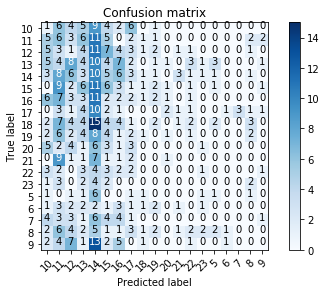

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


df_R4 ['18'] precison: [ 0.05  0.08  0.06] recall: [ 0.07  0.08  0.09] f1: [ 0.05  0.06  0.06]
Confusion matrix, without normalization
[[ 0  0  0  0  0  0  0  2  0  3  3  1  1  0  1  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  2  1  2  3  0  2  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  3  2  9  0  3  1  1  0  1  0  0  0]
 [ 0  0  0  1  2  0  1  5  2  5  6  1  2  2  0  0  0  1  0  0]
 [ 1  0  0  0  1  1  2  3  1  5  8  1  4  1  2  0  0  0  0  0]
 [ 0  0  0  0  2  1  0  4  3  4 14  3  3  3  2  0  0  0  0  0]
 [ 3  0  0  0  0  0  1  3  6  9  5  3  4  3  1  0  1  0  0  0]
 [ 0  0  0  0  0  1  1  6  0 13 17  1 10  4  2  0  0  1  1  0]
 [ 0  1  0  0  1  0  0  7  0  8 12  5  6  3  3  0  0  0  0  0]
 [ 0  1  0  0  1  0  1  4  2  5 10  1  5  3  2  1  1  1  0  0]
 [ 1  0  1  0  2  1  4  4  4  9 11  3  8  2  1  0  1  0  0  0]
 [ 0  1  0  0  0  0  3  2  3  3  7  1  6  1  1  1  1  0  0  0]
 [ 0  0  0  0  0  1  0  9  3  6 23  6  5  4  0  0  2  0  0  0]
 [ 0  0  0  0  2  1  1  3  6  5 14  3  3  4  1

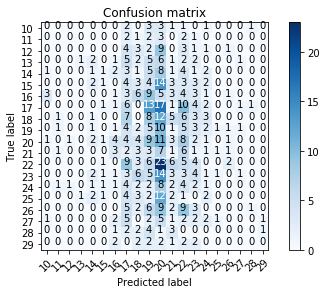

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


df_R5 ['25'] precison: [ 0.07  0.12  0.05] recall: [ 0.09  0.08  0.08] f1: [ 0.06  0.07  0.05]
Confusion matrix, without normalization
[[ 0  0  0  0  0  1  0  0  0  0  0  3  1  4  0  0  0  0]
 [ 0  0  0  0  0  1  0  1  0  1  2  4  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  2  8  2  0  0  1  0  0]
 [ 0  2  0  0  0  1  1  0  1  0  6  5  4  4  1  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  3 17  4  4  1  1  0  0]
 [ 0  0  0  0  0  1  0  2  0  1  3  4  5  3  0  1  0  0]
 [ 0  0  1  0  0  0  0  1  4  0  7 15  1 10  1  4  0  0]
 [ 0  0  0  0  0  0  0  1  1  2  2 21  8  7  0  3  0  0]
 [ 0  0  0  0  0  0  0  2  0  4  4 17 10  5  2  1  0  0]
 [ 0  1  0  0  0  1  1  0  0  2  5 17  8  7  1  1  0  0]
 [ 0  0  0  0  1  1  1  0  0  4  8 31  6  2  3  6  1  1]
 [ 0  1  1  0  0  1  1  1  4  3  4 20  8  7  1  2  0  0]
 [ 0  3  1  0  1  2  0  1  1  3 11 23  6 11  0  1  1  0]
 [ 0  1  0  0  1  4  0  1  2  2  9 19  7  5  1  2  0  0]
 [ 0  0  1  0  0  1  0  2  2  0  1 18 10  3  1  1  0  0]
 [ 0  0  1

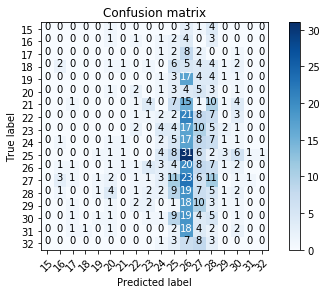

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score

df_R6 ['32'] precison: [ 0.1   0.08  0.08] recall: [ 0.16  0.16  0.16] f1: [ 0.09  0.08  0.08]
Confusion matrix, without normalization
[[ 0  0  0  0  0  0  0  0  0  0  0  1  4]
 [ 0  0  0  0  0  0  0  0  0  0  5  4  6]
 [ 0  0  0  0  0  0  0  0  0  0  2  3  7]
 [ 0  0  0  0  0  0  0  0  1  0  5  6 11]
 [ 0  0  0  0  0  0  0  0  1  0  4  8 16]
 [ 0  1  0  0  0  0  0  0  1  0  7 11 24]
 [ 0  0  0  0  0  0  0  0  1  0  7 12 19]
 [ 0  0  0  0  0  0  0  1  1  0 12 19 16]
 [ 0  1  0  0  0  0  0  0  1  0 14 20 24]
 [ 0  1  0  0  0  0  0  0  0  0 17 27 42]
 [ 0  1  0  1  0  0  0  0  2  1  8 24 36]
 [ 0  3  0  0  0  0  0  0  2  2 21 36 59]
 [ 1  0  0  0  0  0  0  0  3  1 23 34 43]]


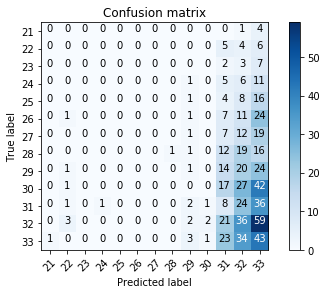

14633 seconds


In [11]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=1000, max_features=None, random_state=14, n_jobs=-1,  class_weight='balanced')

for i in range(1,7):
    df_ =  locals()['df_r'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = classifier_data(df_)
    
    precision, recall, fls = classifier_score(clf)
    
    clf.fit(X_, y_)
    new = clf.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'precison:', precision, 'recall:', recall, 'f1:', fls)

    clf.fit(X_train, y_train)
    class_names = clf.classes_
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred)
    c = np.sum(y_test == y_pred)
    print(report)
    print('n_accuracy:', c)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names)
    plt.show()

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [ ]:
################    1.7 RandomForestClassifier model parameters choose and predict for sorted data

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  7.2min finished
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predict

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  7.2min finished


df_R1 ['1'] 0.0366355140187 precison: [ 0.12  0.12  0.13] recall: [ 0.17  0.18  0.17] f1: [ 0.13  0.14  0.13]
Pipeline(steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=20, max_features=30,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=14, verbose=0, warm_start=False))])
Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  4.8min finished


Confusion matrix, without normalization
[[62  0  0  0 44 15  9  4  3  1  0  0]
 [12  0  0  0  3  2  3  0  1  0  0  0]
 [ 9  0  0  0  3  3  2  0  0  0  0  0]
 [ 5  0  0  0  4  1  3  0  1  0  0  0]
 [42  0  0  0 27  9  2  3  0  2  1  0]
 [45  0  0  0 30 11  5  4  2  0  1  0]
 [26  0  0  0 28  7  5  1  1  0  0  0]
 [38  0  0  0 14  3  2  3  0  0  0  0]
 [20  0  0  0 19  5  2  3  1  0  0  0]
 [20  0  0  0 12  6  2  2  0  0  0  0]
 [14  0  0  0  8  4  4  1  0  0  0  0]
 [17  0  0  0  8  4  2  1  1  1  0  0]]


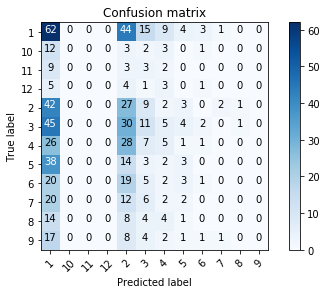

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  9.5min finished
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  9.3min finished


df_R2 ['7'] 0.0824927684039 precison: [ 0.07  0.07  0.08] recall: [ 0.08  0.08  0.09] f1: [ 0.08  0.07  0.08]
Pipeline(steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=20, max_features=30,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=14, verbose=0, warm_start=False))])
Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  6.4min finished


Confusion matrix, without normalization
[[ 3  2  3  2  0  1  0  0  0  1  1  4  1  4  6 13  5]
 [ 2  3  5  0  1  0  1  0  0  2  1  3  3  7  8  9  2]
 [ 4  1  1  3  3  0  2  0  0  0  2  5  0  5  7  3  6]
 [ 4  0  2  3  0  0  1  1  1  1  0  2  2  3  3  9  3]
 [ 4  2  0  2  2  0  0  0  0  0  1  5  1  3  9  5  3]
 [ 7  0  0  1  0  0  0  0  0  0  0  2  2  5  4  1  1]
 [ 5  0  0  2  0  0  0  0  0  1  0  3  1  3  8  6  3]
 [ 0  1  1  1  0  1  0  0  0  0  1  2  1  2  1  1  2]
 [ 0  1  0  0  1  0  0  0  0  0  0  2  1  3  5  2  1]
 [ 1  0  2  0  0  1  0  1  1  0  1  2  3  4  4  2  2]
 [ 1  0  3  1  1  2  1  0  0  0  2  2  3  6 11  8  4]
 [ 2  2  2  3  1  1  0  1  0  0  1  3  0  3  8  6  2]
 [ 2  2  1  3  4  2  0  0  0  2  1  3  5  8 11  4  5]
 [ 7  4  3  4  2  1  0  0  0  0  4  3  2  8  8  5  1]
 [ 5  4  2  2  2  1  0  0  0  0  3  2  4  7  9 12  2]
 [ 5  0  2  1  1  2  1  0  0  0  0  6  5  8 13  6  8]
 [ 4  2  2  0  0  0  0  2  0  1  3  6  4  5 11  3  2]]


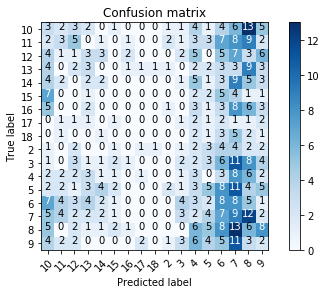

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed: 10.5min finished


Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed: 10.3min finished


df_R3 ['18'] 0.0995551054153 precison: [ 0.06  0.09  0.05] recall: [ 0.07  0.09  0.06] f1: [ 0.06  0.08  0.06]
Pipeline(steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=20, max_features=50,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=14, verbose=0, warm_start=False))])
Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  6.8min finished


Confusion matrix, without normalization
[[4 2 0 3 8 2 5 1 2 3 1 0 0 1 0 0 2 2 2]
 [2 3 4 2 4 6 3 2 6 1 3 2 1 0 0 1 0 3 1]
 [6 4 4 3 6 3 2 1 0 1 2 1 0 0 2 0 2 6 1]
 [4 9 4 3 6 1 6 2 2 2 2 2 1 1 0 2 0 3 4]
 [5 4 1 3 8 2 3 4 2 0 6 0 0 2 0 1 4 6 2]
 [2 3 4 3 6 3 3 4 2 4 1 1 0 2 2 0 1 3 1]
 [3 3 2 1 2 5 5 5 2 3 1 0 0 2 1 1 1 1 3]
 [1 2 0 2 2 5 1 4 5 1 3 1 0 0 1 1 1 1 0]
 [5 3 2 4 4 3 6 3 4 5 0 3 0 4 1 1 1 1 1]
 [4 0 2 2 2 2 2 1 1 0 4 2 3 1 0 0 4 2 2]
 [3 3 1 1 1 3 2 1 0 0 2 0 1 1 0 1 1 2 3]
 [0 4 2 0 8 2 0 0 1 0 1 0 0 1 0 1 1 2 0]
 [0 0 2 3 3 3 1 0 1 2 2 0 0 0 0 0 2 0 2]
 [1 0 1 2 3 0 0 2 0 1 1 0 0 0 0 1 0 2 0]
 [1 1 0 0 2 1 1 1 0 0 2 1 0 0 2 1 1 0 0]
 [3 0 1 0 2 3 2 0 1 0 3 0 0 2 0 0 1 1 1]
 [4 0 4 3 4 1 2 1 3 0 2 1 0 0 1 0 1 0 0]
 [2 3 0 7 3 2 3 0 0 0 2 0 1 3 0 2 2 1 4]
 [1 5 3 2 4 4 2 1 2 0 1 1 3 0 2 0 1 2 3]]


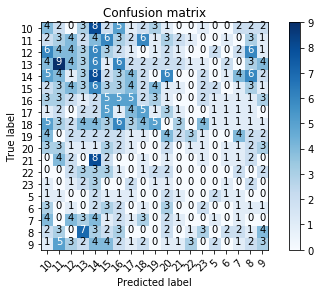

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed: 10.5min finished


Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed: 10.9min finished


df_R4 ['19'] 0.0 precison: [ 0.06  0.06  0.06] recall: [ 0.07  0.08  0.08] f1: [ 0.07  0.07  0.07]
Pipeline(steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=20, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=14, verbose=0, warm_start=False))])
Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  7.3min finished


Confusion matrix, without normalization
[[ 0  0  0  0  2  0  0  1  1  2  0  2  2  0  1  1  0  0  0  0]
 [ 0  2  0  0  0  1  0  1  1  1  1  0  1  3  0  0  0  0  0  0]
 [ 0  0  1  0  1  1  0  2  1  5  2  3  3  0  2  2  1  0  0  0]
 [ 0  0  1  0  2  2  3  1  0  0  5  3  5  3  1  1  1  0  0  0]
 [ 0  0  1  1  0  0  1  3  1  6  6  2  1  0  3  0  4  1  0  0]
 [ 0  0  0  2  1  1  2  2  4  4  7  4  4  2  2  3  0  0  0  1]
 [ 0  0  0  0  4  3  4  3  3  4  3  1  5  2  4  0  2  0  0  1]
 [ 1  1  2  0  2  1  0  6  3  7  8  0  9  5  7  2  1  1  1  0]
 [ 0  0  1  0  3  1  5  5  4  4  9  3  5  2  2  1  1  0  0  0]
 [ 0  0  0  2  3  0  1  4  3  3  4  1  3  6  3  1  0  2  0  2]
 [ 1  3  0  0  1  0  1  1  6  4  9  1 14  6  3  0  2  0  0  0]
 [ 0  0  0  0  0  1  2  3  3  4  6  2  2  2  1  2  1  1  0  0]
 [ 2  4  1  1  2  0  0  7  4  5  5  5  9  7  3  1  3  0  0  0]
 [ 0  1  0  3  2  0  1  4  2  6  6  3  5  5  3  2  2  0  0  0]
 [ 0  0  0  1  0  0  1  1  3  2  7  5  3  4  2  0  1  0  0  0]
 [ 1  2  0  0  

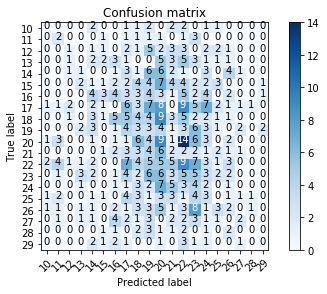

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed: 10.0min finished


Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed: 10.2min finished


df_R5 ['20'] 0.0349420849421 precison: [ 0.08  0.08  0.08] recall: [ 0.08  0.09  0.08] f1: [ 0.08  0.08  0.08]
Pipeline(steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=20, max_features=99,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=14, verbose=0, warm_start=False))])
Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  6.8min finished


Confusion matrix, without normalization
[[ 0  0  0  0  0  0  0  3  1  0  1  1  1  1  1  0  0  0]
 [ 0  0  0  0  0  2  1  0  0  1  0  2  2  0  0  3  0  1]
 [ 1  0  2  0  1  1  1  0  1  0  1  2  0  2  0  0  2  0]
 [ 0  0  0  2  0  3  3  1  1  2  3  1  1  2  3  5  0  0]
 [ 0  0  0  1  0  1  2  1  1  2  5  2  2  7  2  5  0  0]
 [ 1  0  0  0  1  1  1  2  1  2  2  5  1  2  1  0  0  0]
 [ 0  1  0  0  3  2  2  2  2  6  1  7  2  4  5  4  2  1]
 [ 0  0  2  0  1  1  1  4  2  1  6  6  7  5  3  3  1  2]
 [ 0  2  1  0  1  2  2  5  1  4  2  3  4  6  3  7  0  2]
 [ 0  1  3  0  2  1  5  4  2  1  4  4  3  6  2  3  2  1]
 [ 0  0  1  1  1  7  0  6  4  2  6  9  7  7  6  5  2  1]
 [ 0  0  2  0  1  4  0  6  6  3  6  4  4  6  6  4  2  0]
 [ 1  0  0  2  0  4  3  7  2  6  7  7  7  5  8  3  3  0]
 [ 1  1  1  2  3  2  0  1  2  6  6 10  6  4  3  5  1  0]
 [ 0  0  1  1  1  1  1  2  6  0  4  8  4  3  4  2  2  0]
 [ 0  1  2  1  0  2  1  4  1  2  3  8  3  9  1  4  0  1]
 [ 0  0  1  0  0  2  2  1  2  2  1  5  5  2  4  

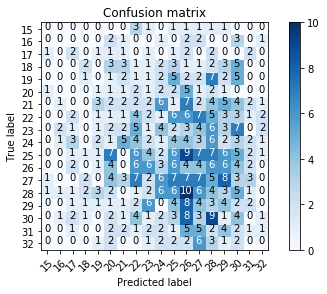

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  7.7min finished
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  7.8min finished


df_R6 ['33'] 0.0 precison: [ 0.13  0.11  0.14] recall: [ 0.15  0.13  0.16] f1: [ 0.13  0.12  0.13]
Pipeline(steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=50, max_features=50,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=14, verbose=0, warm_start=False))])
Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  5.2min finished


Confusion matrix, without normalization
[[ 0  0  0  0  0  0  0  0  0  0  0  1  4]
 [ 0  0  0  0  0  0  1  0  1  3  3  3  4]
 [ 0  0  0  0  0  0  1  1  1  1  2  2  4]
 [ 0  0  0  0  0  0  0  0  4  2  6  6  5]
 [ 0  0  0  0  0  0  0  2  6  1  5  7  8]
 [ 0  0  0  0  0  1  1  2  5  5  8 14  8]
 [ 0  0  0  0  0  0  0  1  6  4 10  5 13]
 [ 0  0  0  0  0  1  1  0  2  6  6 15 18]
 [ 0  0  0  0  1  0  1  0  5  5 14 18 16]
 [ 0  0  0  1  1  0  3  3 10  1 22 19 27]
 [ 0  0  0  2  0  0  1  2  7 10 14 18 19]
 [ 0  0  0  0  1  1  4  2 16 11 28 26 34]
 [ 0  0  0  0  0  2  1  1 10 10 20 34 27]]


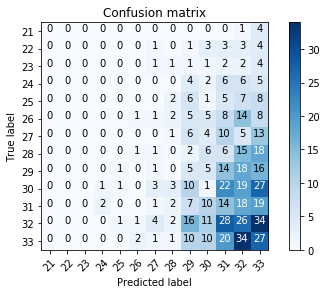

9090 seconds


In [14]:
#########    RF predict result
from sklearn.ensemble import RandomForestClassifier
starttime = datetime.now()
#start = time.time()

pipeline_RF = Pipeline([('clf', RandomForestClassifier(random_state=14, class_weight='balanced'))])
# class_weight='balanced' can solve sparse problem, but it still exsit
parameter_space = {'clf__max_features':[2, 30, 50, 99, 'auto'], 
                   'clf__n_estimators': [10, 20, 50, 100, 1000], 
                   'clf__criterion': ['gini', 'entropy'], 
                   'clf__min_samples_leaf': [2, 4, 6, 8, 10],
                   'clf__max_depth': [20, 50, 100]}

for i in range(1,7):
    df_ =  locals()['df_r'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = classifier_data(df_)
    
    grid_RF = GridSearchCV(pipeline_RF, parameter_space, n_jobs=-1, verbose=1)
    grid_RF.fit(X_, y_)
    
    # evaluation for best parameter
    precision, recall, fls = classifier_score(grid_RF.best_estimator_)
    
    grid_RF.fit(X_, y_)
    new = grid_RF.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, p_new, 'precison:', precision, 'recall:', recall, 'f1:', fls)
    print(grid_RF.best_estimator_)
    
    grid_RF.fit(X_train, y_train)
    class_names = np.unique(y_train)
    y_pred = grid_RF.predict(X_test)
    report = classification_report(y_test, y_pred)
    c = np.sum(y_test == y_pred)
    print(report)
    print('n_accuracy:', c)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names)
    plt.show())

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [ ]:
################    2.  Regressor model for sorted data

In [3]:
def regressor_data(df_):
    # choose frequence >10 samples
    df = df_[df_.ilco[-1].isin(df_.ilco[-1].groupby(df_.ilco[-1]).count()[df_.ilco[-1].groupby(df_.ilco[-1]).count()>30].index)]
    X_ = df.iloc[:, : -1].values
    y_ =  df.ilco[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=14)
    return X_, y_, X_train, X_test, y_train, y_test
def regressor_score(clf, cv=3):
    NMAE = cross_val_score(clf, X_, y_, cv=cv, scoring='neg_median_absolute_error')
    NMSE = cross_val_score(clf, X_, y_, cv=cv, scoring='neg_mean_squared_error')
    r2 = cross_val_score(clf, X_, y_, cv=cv, scoring='r2')
    return NMAE, NMSE, r2

In [ ]:
################    2.2 DecisionTreeRegressor model parameters choose and predict for sorted data

In [19]:
from sklearn.tree import DecisionTreeRegressor
pipeline_DT = Pipeline([('clf', DecisionTreeRegressor(random_state=14))])
paras_DT = {'clf__max_depth': (2, 10, 50),
            'clf__criterion': ('mse', 'friedman_mse', 'mae'),
            'clf__min_samples_split': (2, 3, 4),
            'clf__min_samples_leaf': (20, 30, 40)}
for i in range(1,7):
    df_ =  locals()['df_r'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = regressor_data(df_)
    
    grid_DT=GridSearchCV(pipeline_DT, paras_DT, n_jobs=-1, verbose=1, scoring=None)
    #default=None, and the default scorer of DT is accuracy. see also DecisionTreeClassifier.score(X, y)
    grid_DT.fit(X_, y_)
    # evaluation for best parameters
    '''EV = cross_val_score(grid_DT.best_estimator_, X_train, y_train, cv=3, scoring='explained_variance')
    #  'explained_variance' is not a valid scoring value???'''
    NMAE, NMSE, r2 = regressor_score(grid_DT.best_estimator_, 3)
    [new] = grid_DT.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'neg_median_absolute_error:', NMAE, 'neg_mean_squared_error:', NMSE, 'r2:', r2)
    print(grid_DT.best_estimator_)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   42.7s finished


df_R1 4.28756830601 neg_median_absolute_error: [-2.1  -2.08 -2.35] neg_mean_squared_error: [-9.09 -8.56 -9.21] r2: [-0.05 -0.02 -0.01]
Pipeline(steps=[('clf', DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=20, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=14,
           splitter='best'))])
Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   44.6s finished


df_R2 8.46507352941 neg_median_absolute_error: [-3.23 -3.09 -3.03] neg_mean_squared_error: [-17.15 -17.84 -18.36] r2: [-0.   -0.03 -0.03]
Pipeline(steps=[('clf', DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=40, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=14,
           splitter='best'))])
Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  1.0min finished


df_R3 14.1378378378 neg_median_absolute_error: [-3.6  -3.84 -3.88] neg_mean_squared_error: [-22.86 -22.2  -21.22] r2: [-0.03 -0.03 -0.02]
Pipeline(steps=[('clf', DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=20, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=14,
           splitter='best'))])
Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   48.6s finished


df_R4 19.5348326934 neg_median_absolute_error: [-3.51 -3.84 -3.49] neg_mean_squared_error: [-23.16 -23.36 -21.41] r2: [-0.03 -0.01 -0.01]
Pipeline(steps=[('clf', DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=20, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=14,
           splitter='best'))])
Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  1.1min finished


df_R5 24.3328413284 neg_median_absolute_error: [-3.27 -3.24 -3.26] neg_mean_squared_error: [-18.94 -19.3  -18.03] r2: [-0.04 -0.   -0.01]
Pipeline(steps=[('clf', DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=40, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=14,
           splitter='best'))])
Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  1.1min finished


df_R6 30.0734824281 neg_median_absolute_error: [-2.28 -2.27 -2.2 ] neg_mean_squared_error: [ -9.92 -10.2  -10.36] r2: [-0.02 -0.02 -0.02]
Pipeline(steps=[('clf', DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=20, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=14,
           splitter='best'))])
10119 seconds


In [ ]:
################    2.3  AdaBoostRegressor model parameters choose and predict for sorted data

In [23]:
from sklearn.ensemble import AdaBoostRegressor
clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2, random_state=14, criterion='mse'), 
                        n_estimators=5000, learning_rate=1.0, loss='linear', random_state=14)

for i in range(1,7):
    df_ =  locals()['df_r'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = regressor_data(df_)

    # evaluation for best parameters
    '''EV = cross_val_score(grid_DT.best_estimator_, X_train, y_train, cv=3, scoring='explained_variance')
    #  'explained_variance' is not a valid scoring value???'''
    NMAE, NMSE, r2 = regressor_score(clf, 3)
    clf.fit(X_, y_)
    [new] = clf.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'neg_median_absolute_error:', NMAE, 'neg_mean_squared_error:', NMSE, 'r2:', r2)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

df_R1 4.89078282828 neg_median_absolute_error: [-2.55 -2.77 -2.59] neg_mean_squared_error: [-8.91 -8.73 -9.41] r2: [-0.03 -0.04 -0.03]
df_R2 8.79548229548 neg_median_absolute_error: [-3.12 -3.3  -3.45] neg_mean_squared_error: [-17.05 -17.79 -17.98] r2: [ 0.   -0.02 -0.01]
df_R3 14.3619696176 neg_median_absolute_error: [-3.85 -3.56 -3.55] neg_mean_squared_error: [-22.49 -21.93 -21.05] r2: [-0.01 -0.02 -0.01]
df_R4 19.5078888054 neg_median_absolute_error: [-3.52 -3.87 -3.42] neg_mean_squared_error: [-22.78 -23.5  -21.08] r2: [-0.01 -0.02  0.  ]
df_R5 24.4720357942 neg_median_absolute_error: [-3.38 -3.34 -3.16] neg_mean_squared_error: [-18.49 -19.34 -17.98] r2: [-0.02 -0.   -0.01]
df_R6 28.6116700201 neg_median_absolute_error: [-2.57 -2.68 -2.59] neg_mean_squared_error: [-10.6  -10.32 -10.21] r2: [-0.09 -0.03 -0.01]
10658 seconds


In [ ]:
################    2.4  BaggingRegressor model parameters choose and predict for sorted data

In [24]:
from sklearn.ensemble import BaggingRegressor
clf = BaggingRegressor(DecisionTreeRegressor(max_depth=2, random_state=14, criterion='mse'), 
                        random_state=14, n_estimators=1000, n_jobs=-1)

for i in range(1,7):
    df_ =  locals()['df_r'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = regressor_data(df_)

    # evaluation for best parameters
    '''EV = cross_val_score(grid_DT.best_estimator_, X_train, y_train, cv=3, scoring='explained_variance')
    #  'explained_variance' is not a valid scoring value???'''
    NMAE, NMSE, r2 = regressor_score(clf, 3)
    clf.fit(X_, y_)
    [new] = clf.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'neg_median_absolute_error:', NMAE, 'neg_mean_squared_error:', NMSE, 'r2:', r2)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')


df_R1 4.10822721614 neg_median_absolute_error: [-2.23 -2.26 -2.25] neg_mean_squared_error: [-8.74 -8.4  -9.15] r2: [-0.01 -0.   -0.  ]
df_R2 8.90340751064 neg_median_absolute_error: [-3.05 -3.19 -3.13] neg_mean_squared_error: [-17.04 -17.46 -17.9 ] r2: [ 0.   -0.01 -0.  ]
df_R3 13.8536898898 neg_median_absolute_error: [-3.9  -3.62 -3.26] neg_mean_squared_error: [-22.34 -21.74 -20.82] r2: [-0.01 -0.01 -0.  ]
df_R4 19.542763317 neg_median_absolute_error: [-3.55 -3.6  -3.39] neg_mean_squared_error: [-22.68 -23.06 -21.05] r2: [-0.  0.  0.]
df_R5 24.5848431848 neg_median_absolute_error: [-3.43 -3.41 -3.2 ] neg_mean_squared_error: [-18.25 -19.21 -17.9 ] r2: [-0.    0.   -0.01]
df_R6 29.4902509117 neg_median_absolute_error: [-2.51 -2.61 -2.48] neg_mean_squared_error: [ -9.74 -10.03 -10.18] r2: [-0.   -0.   -0.01]
11411 seconds


In [ ]:
################    2.5  GradientBoostingRegressor model parameters choose and predict for sorted data

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(learning_rate=0.1, n_estimators=1000, random_state=14, loss='ls', criterion='friedman_mse')

for i in range(1,7):
    df_ =  locals()['df_r'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = regressor_data(df_)

    # evaluation for best parameters
    '''EV = cross_val_score(grid_DT.best_estimator_, X_train, y_train, cv=3, scoring='explained_variance')
    #  'explained_variance' is not a valid scoring value???'''
    NMAE, NMSE, r2 = regressor_score(clf, 3)
    clf.fit(X_, y_)
    [new] = clf.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'neg_median_absolute_error:', NMAE, 'neg_mean_squared_error:', NMSE, 'r2:', r2)
    
endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

df_R1 0.942806146814 neg_median_absolute_error: [-2.44 -2.35 -2.59] neg_mean_squared_error: [-10.36 -11.15 -11.49] r2: [-0.19 -0.33 -0.26]
df_R2 9.20461758828 neg_median_absolute_error: [-3.14 -3.65 -3.4 ] neg_mean_squared_error: [-19.04 -21.42 -21.14] r2: [-0.11 -0.23 -0.19]
df_R3 13.3868691257 neg_median_absolute_error: [-3.82 -4.1  -3.75] neg_mean_squared_error: [-26.31 -27.95 -24.73] r2: [-0.19 -0.3  -0.19]
df_R4 19.6904281988 neg_median_absolute_error: [-3.77 -3.82 -3.64] neg_mean_squared_error: [-27.79 -27.15 -25.41] r2: [-0.23 -0.17 -0.2 ]
df_R5 24.9933642172 neg_median_absolute_error: [-3.48 -3.47 -3.41] neg_mean_squared_error: [-22.11 -22.55 -21.52] r2: [-0.22 -0.17 -0.21]
df_R6 31.2429754251 neg_median_absolute_error: [-2.28 -2.61 -2.57] neg_mean_squared_error: [-11.51 -12.84 -12.19] r2: [-0.18 -0.28 -0.21]
14968 seconds


In [ ]:
################    2.6  ExtraTreesRegressor model parameters choose and predict for sorted data

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
clf = ExtraTreesRegressor(n_estimators=1000, max_features=None, random_state=14, n_jobs=-1)

for i in range(1,7):
    df_ =  locals()['df_r'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = regressor_data(df_)

    # evaluation for best parameters
    '''EV = cross_val_score(grid_DT.best_estimator_, X_train, y_train, cv=3, scoring='explained_variance')
    #  'explained_variance' is not a valid scoring value???'''
    NMAE, NMSE, r2 = regressor_score(clf, 3)
    clf.fit(X_, y_)
    [new] = clf.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'neg_median_absolute_error:', NMAE, 'neg_mean_squared_error:', NMSE, 'r2:', r2)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [ ]:
################    2.7  RandomForestRegressor model parameters choose and predict for sorted data

In [4]:
#########    RF predict result
from sklearn.ensemble import RandomForestRegressor
starttime = datetime.now()
#start = time.time()

pipeline_RF = Pipeline([('clf', RandomForestRegressor(random_state=14, n_estimators=10, n_jobs=-1))])
# class_weight='balanced' can solve sparse problem, but it still exsit
parameter_space = {'clf__max_features':[2, None, 'auto'],  
                   'clf__criterion': ['mse', 'mae'], 
                   'clf__min_samples_leaf': [2, 6],
                   'clf__max_depth': [2, 20, None]}

for i in range(1,7):
    df_ =  locals()['df_r'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = regressor_data(df_)

    
    grid_RF = GridSearchCV(pipeline_RF, parameter_space, n_jobs=-1, verbose=1)
    #grid_RF.fit(X_, y_)
    grid_RF.fit(X_, y_)
    # evaluation for best parameters
    NMAE, NMSE, r2 = regressor_score(grid_RF.best_estimator_, 3)
    
    [new] = grid_RF.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'neg_median_absolute_error:', NMAE, 'neg_mean_squared_error:', NMSE, 'r2:', r2)
    print(grid_RF.best_estimator_)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  1.9min finished


df_R1 4.03642726317 neg_median_absolute_error: [-2.26731884 -2.304888   -2.28838464] neg_mean_squared_error: [-8.70422089 -8.40265972 -9.17269991] r2: [-0.00192358 -0.00085442 -0.00584142]
Pipeline(steps=[('clf', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features=2, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=14, verbose=0, warm_start=False))])
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  2.2min finished


df_R2 8.99285269455 neg_median_absolute_error: [-3.11032887 -3.22920437 -3.12148489] neg_mean_squared_error: [-17.16267228 -17.50032161 -17.8757308 ] r2: [-0.00464078 -0.00785199 -0.00327683]
Pipeline(steps=[('clf', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features=2, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=6, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=14, verbose=0, warm_start=False))])
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  2.5min finished


df_R3 14.1177056945 neg_median_absolute_error: [-3.87550597 -3.71096469 -3.3661215 ] neg_mean_squared_error: [-22.36835632 -21.61178632 -20.89079313] r2: [-0.00858223 -0.00514505 -0.00357865]
Pipeline(steps=[('clf', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features=2, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=6, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=14, verbose=0, warm_start=False))])
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  2.2min finished


df_R4 19.417239441 neg_median_absolute_error: [-3.50557688 -3.58114482 -3.42323496] neg_mean_squared_error: [-22.52838754 -23.06509175 -21.20972836] r2: [ 0.00194644  0.0026681  -0.0034101 ]
Pipeline(steps=[('clf', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features=2, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=14, verbose=0, warm_start=False))])
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  2.3min finished


df_R5 24.4788378152 neg_median_absolute_error: [-3.3755338  -3.37989745 -3.2774232 ] neg_mean_squared_error: [-18.33503348 -19.19814343 -18.00294127] r2: [-0.00794467  0.00254686 -0.01198329]
Pipeline(steps=[('clf', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features=2, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=6, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=14, verbose=0, warm_start=False))])
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  2.2min finished


df_R6 29.3356467067 neg_median_absolute_error: [-2.48520136 -2.5564651  -2.47548731] neg_mean_squared_error: [ -9.7326673  -10.01574671 -10.2693789 ] r2: [-0.00040497  0.00013662 -0.01485079]
Pipeline(steps=[('clf', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features=2, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=6, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=14, verbose=0, warm_start=False))])
838 seconds


In [ ]:
################    3 multiclass model for raw data
################    3.1 preprocessing data for raw data

In [6]:
X = df.loc[:, 'sr1': 'sr6']
starttime = datetime.now()
(num_rows, num_columns) = X.shape
def creat_datasets(X, features ):
    df_ = pd.DataFrame(columns = list(range(0, features)))
    index = 0
    for i in range(features, num_rows+1):
        df_.loc[index] = X[col][i-features: i].reset_index(drop = True)
        index += 1
    return df_

for col in X.columns :
    locals()['df_'+ str(col)] = creat_datasets(X, 100)
endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')
# 至此6个数据集完成

57 seconds


In [ ]:
'''
pro_ball = defaultdict(int)
pipeline_DT = Pipeline([('clf', DecisionTreeClassifier(random_state=14))])
paras_DT = {'clf__max_depth': (2, 10, 50),
            'clf__criterion': ('gini', 'entropy'),
            #'clf__min_samples_split': (2, 3),
            'clf__min_samples_leaf': (20, 30, 40)}
new =[]
for r in range(-10, 0):
    for i in range(1,7):
        df_ =  locals()['df_r'+ str(i)]
        df_ = df_[df_[99].isin(df_[99].groupby(df_[99]).count()[df_[99].groupby(df_[99]).count()>10].index)]
        X_train = df_.iloc[:r, : -1].values
        y_train = df_[99][:r].astype(str).values
        #y_train = [1 if x else 0 for x in y_train]
        grid_search_DT=GridSearchCV(pipeline_DT, paras_DT, n_jobs=-1, verbose=1)
        grid_search_DT.fit(X_train, y_train)
        pro_ball[i] = grid_search_DT.predict(df_.iloc[r-1, 1: ].values.reshape(1, -1))
        
    print(pro_ball)
    new.append(sorted(int(v) for (k, [v]) in pro_ball.items()))
    print(r)'''